In [1]:

# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/SER_Capstone/



# import keras
# from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense
# from keras.models import Model
# from keras.metrics import Recall
# from tensorflow.keras.optimizers import Adam 
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import models, layers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import soundfile as sf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import random
import sys

import librosa
import librosa.display

from scipy import signal 



import IPython.display as ipd



import os
import glob
import shutil


import pickle


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [3]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                 
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    if file.startswith('.'):
                        pass
                    else:
                        file_emotion.append(emotions.lower())
                        file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                        file_actor.append(dir)
     

In [4]:
print(f'Number of file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number of file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [5]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

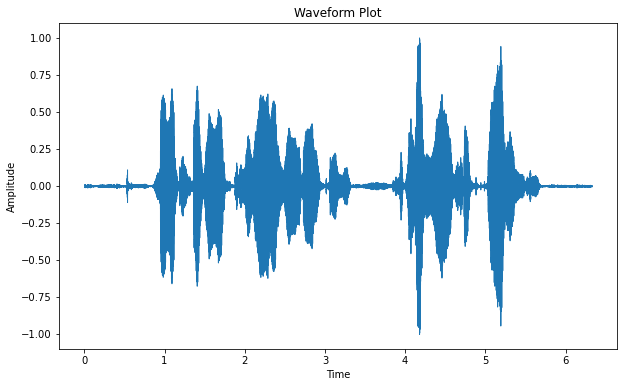

In [6]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_00003.wav')





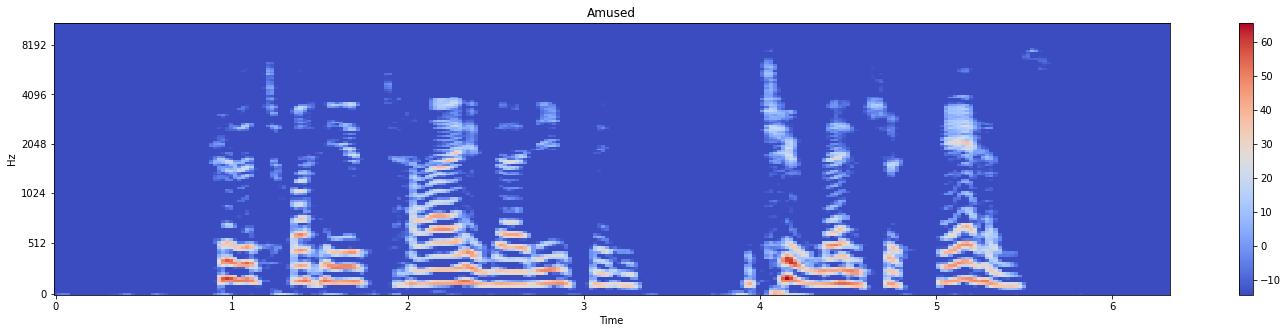

In [7]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(25, 5))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

## EDA Visuals

In [8]:
df.emotion.value_counts()

sleepy       1721
neutral      1568
amused       1317
angry        1268
disgusted    1019
Name: emotion, dtype: int64

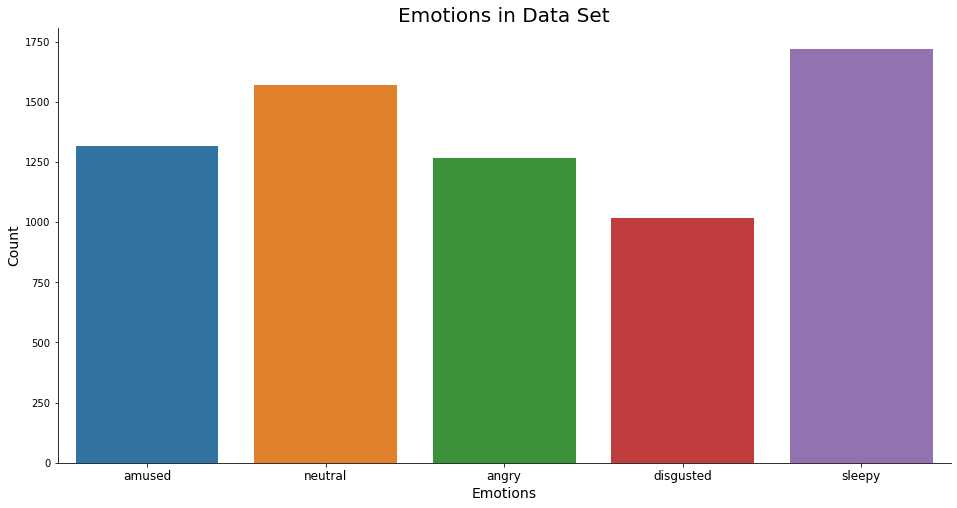

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.emotion)
plt.title('Emotions in Data Set', size=20)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Emotion_count')
plt.show()

sam      2453
jenie    1790
bea      1787
josh      863
Name: actor, dtype: int64


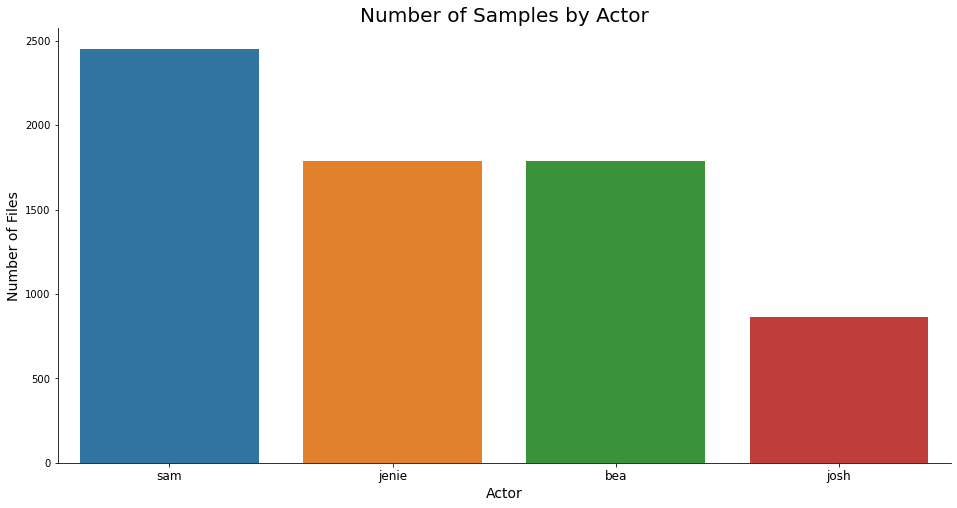

In [10]:
print(df.actor.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.actor)
plt.title('Number of Samples by Actor', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Actor', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Actor_count')
plt.show()

female    3577
male      3316
Name: sex, dtype: int64


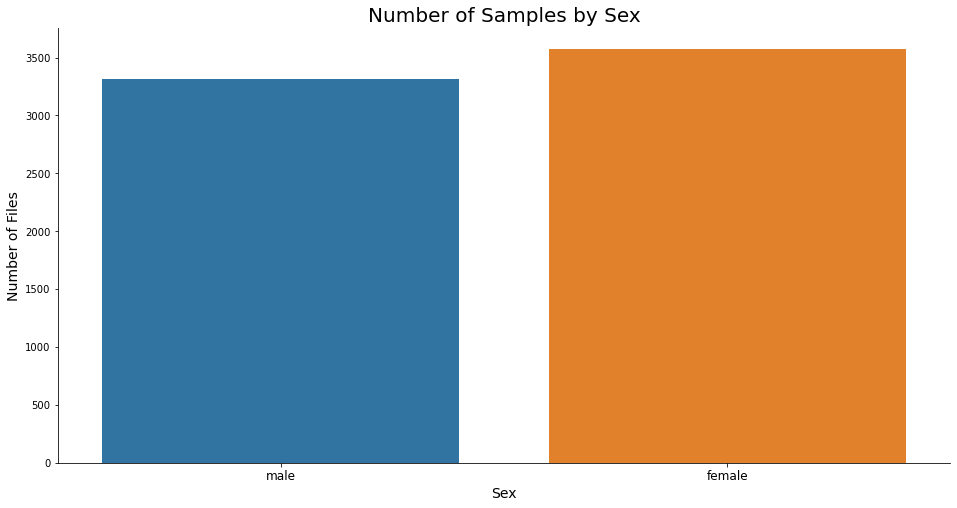

In [11]:
print(df.sex.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.sex)
plt.title('Number of Samples by Sex', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Sex', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/sex_count')
plt.show()

In [12]:
df


,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


# We will now remove any silence in the begining and end of the audio clips and save these new files to the folder trimmed_audio

In [13]:
def the_trimmer(path):
    
    path_stripped = os.path.basename(path).strip(".wav")

    audio_data_test, sampling_rate_test = librosa.load(path)
    audio_data_test2, index = librosa.effects.trim(audio_data_test, top_db = 30.0 )
    
    
    sf.write(f'trimmed_audio/{path_stripped}.wav', audio_data_test2, sampling_rate_test, format='wav')


In [14]:
# df["file_path"].apply(lambda x: the_trimmer(x))

##Commented out as not to affect future runs


# Now that we have trimmed our silence we will log all paths in this folder

In [15]:
pathway = 'trimmed_audio/'
path_list = os.listdir(pathway) 



file_path_trimmed = []

for file in path_list:
    if file.startswith('.'):
        pass
    else:
        file_path_trimmed.append(pathway + file)
     

In [16]:
file_path_trimmed

['trimmed_audio/jenie_anger_00105.wav',
 'trimmed_audio/sam_disgust_00189.wav',
 'trimmed_audio/bea_amused_00234.wav',
 'trimmed_audio/sam_sleepy_00408.wav',
 'trimmed_audio/bea_amused_00220.wav',
 'trimmed_audio/sam_angry_00358.wav',
 'trimmed_audio/jenie_anger_00111.wav',
 'trimmed_audio/bea_angry_00238.wav',
 'trimmed_audio/jenie_anger_00139.wav',
 'trimmed_audio/jenie_sleepy_00397.wav',
 'trimmed_audio/sam_angry_00416.wav',
 'trimmed_audio/bea_angry_00210.wav',
 'trimmed_audio/jenie_disgusted_00097.wav',
 'trimmed_audio/jenie_neutral_00043.wav',
 'trimmed_audio/bea_disgusted_00256.wav',
 'trimmed_audio/sam_sleepy_00352.wav',
 'trimmed_audio/sam_sleepy_00434.wav',
 'trimmed_audio/josh_amused00223.wav',
 'trimmed_audio/jenie_amused_00062.wav',
 'trimmed_audio/bea_amused_00208.wav',
 'trimmed_audio/sam_angry_00370.wav',
 'trimmed_audio/sam_neutral_00298.wav',
 'trimmed_audio/sam_angry_00364.wav',
 'trimmed_audio/sam_sleepy_00420.wav',
 'trimmed_audio/josh_amused00237.wav',
 'trimmed_a

In [17]:
len(file_path_trimmed)

6733

In [18]:
trimmed_audio_df = pd.DataFrame(file_path_trimmed, columns = {"trimmed_paths"} )
trimmed_audio_df

,trimmed_paths
0,trimmed_audio/jenie_anger_00105.wav
1,trimmed_audio/sam_disgust_00189.wav
2,trimmed_audio/bea_amused_00234.wav
3,trimmed_audio/sam_sleepy_00408.wav
4,trimmed_audio/bea_amused_00220.wav
...,...
6728,trimmed_audio/bea_angry_00235.wav
6729,trimmed_audio/sam_angry_00433.wav
6730,trimmed_audio/bea_disgusted_00273.wav
6731,trimmed_audio/sam_sleepy_00377.wav


## We can now cut the data up into 2 second clips for easier workablitiy

In [19]:
def the_chopper(path):
    path_stripped = os.path.basename(path).strip(".wav")
    data, sr = sf.read(path)
    split = []
    noSections = int(np.ceil(len(data) / sr))

    for i in range(noSections):
        temp = data[i*sr:i*sr + sr*2] 
        split.append(temp)
    

    for i in range(noSections)[::2]:
        filename = f"chopped_wavs/{path_stripped}_chopped{i}.wav"
        sf.write(filename, split[i], sr)
 
      

In [20]:
# trimmed_audio_df["trimmed_paths"].apply(lambda x: the_chopper(x))

##Commented out as not to affect future runs


In [21]:
pathway = 'chopped_wavs/'
pathway_to_files = os.listdir(pathway) 


file_path_chop = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        file_path_chop.append(pathway + file)
    
        
     

In [22]:
len(file_path_chop)

16833

In [23]:
chopped_audio_df = pd.DataFrame(file_path_chop, columns = {"chopped_paths"} )
chopped_audio_df

,chopped_paths
0,chopped_wavs/sam_neutral_00400_chopped0.wav
1,chopped_wavs/bea_sleepy_00027_chopped0.wav
2,chopped_wavs/josh_sleepy00005_chopped2.wav
3,chopped_wavs/bea_amused_00289_chopped0.wav
4,chopped_wavs/jenie_sleepy_00157_chopped0.wav
...,...
16828,chopped_wavs/sam_sleepy_00386_chopped0.wav
16829,chopped_wavs/jenie_sleepy_00164_chopped0.wav
16830,chopped_wavs/bea_disgusted_00269_chopped2.wav
16831,chopped_wavs/sam_amused_00128_chopped0.wav


In [24]:
X_train, X_test = train_test_split(chopped_audio_df["chopped_paths"], test_size=0.25, random_state=42, shuffle = True)


In [25]:
X_train_df = pd.DataFrame(X_train, columns = {"chopped_paths"} )
X_test_df = pd.DataFrame(X_test, columns = {"chopped_paths"} )


In [26]:
X_train_df

,chopped_paths
6840,chopped_wavs/sam_sleepy_00401_chopped6.wav
10144,chopped_wavs/bea_amused_00066_chopped0.wav
7592,chopped_wavs/bea_sleepy_00372_chopped4.wav
2412,chopped_wavs/sam_angry_00243_chopped2.wav
9707,chopped_wavs/bea_sleepy_00430_chopped6.wav
...,...
11284,chopped_wavs/sam_disgust_00370_chopped2.wav
11964,chopped_wavs/sam_sleepy_00421_chopped6.wav
5390,chopped_wavs/sam_amused_00117_chopped0.wav
860,chopped_wavs/jenie_amused_00084_chopped0.wav


In [27]:
X_test_df

,chopped_paths
1302,chopped_wavs/jenie_sleepy_00103_chopped4.wav
736,chopped_wavs/sam_neutral_00415_chopped0.wav
10359,chopped_wavs/jenie_neutral_00181_chopped0.wav
4625,chopped_wavs/bea_disgusted_00086_chopped4.wav
13818,chopped_wavs/bea_amused_00009_chopped0.wav
...,...
2753,chopped_wavs/bea_sleepy_00022_chopped8.wav
12293,chopped_wavs/bea_sleepy_00488_chopped0.wav
14739,chopped_wavs/jenie_neutral_00380_chopped2.wav
13872,chopped_wavs/bea_disgusted_00155_chopped2.wav


Our X train data will be augmented in order to introduce random noise, speed, and pitch variabilitly. X_test will remain unaugmented

In [28]:
def noise(data):
    amplitude = 0.015*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.9, 1.1), 2)
    spedup = librosa.effects.time_stretch(data, random_rate)
    return spedup


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.85, 1.15), 2)
    pitched = librosa.effects.pitch_shift(data, sampling_rate, random_pitch)
    return pitched

def augmentation(path):
    path_stripped = os.path.basename(path).strip(".wav")
    audio_data, sampling_rate = librosa.load(path)  
    noised = noise(audio_data)
    sped = speed_random(noised)
    pitcher = pitch(sped, sampling_rate)
    sf.write(f'aug_train_wavs/{path_stripped}.wav', pitcher, sampling_rate, format='wav')
    return

def copier(path):
    path_stripped = os.path.basename(path).strip(".wav")
    audio_data, sampling_rate = librosa.load(path)
    sf.write(f'test_wavs/{path_stripped}.wav', audio_data, sampling_rate, format='wav')


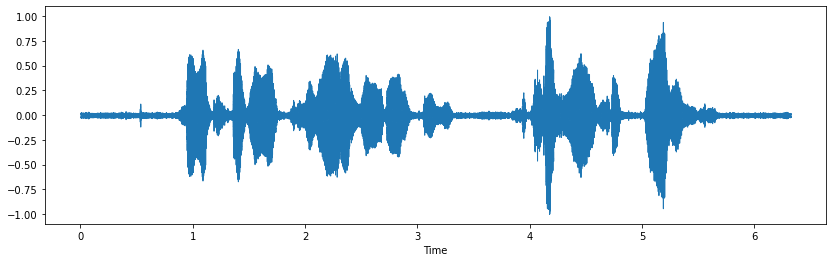

In [29]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

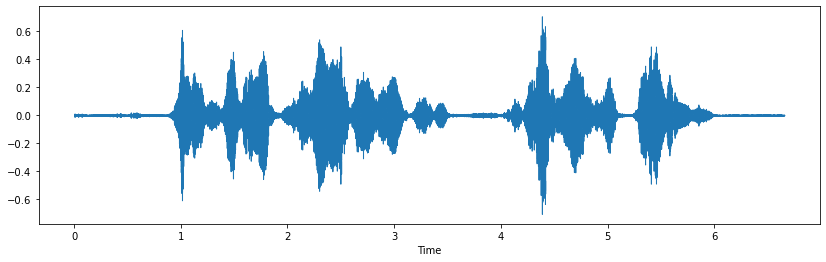

In [30]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

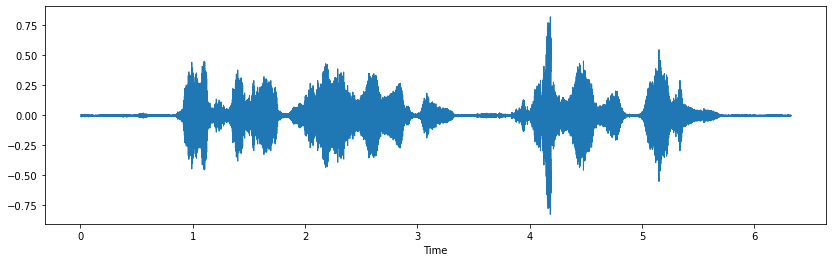

In [31]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

In [32]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



# augmentation(file_name)

In [33]:
# X_test_df["chopped_paths"].apply(lambda x: copier(x))

##Commented out as not to affect future runs


In [34]:
# X_train_df["chopped_paths"].apply(lambda x: augmentation(x))

##Commented out as not to affect future runs


## Augmenting the Data to account for variablity of human voice and recording equipment

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [35]:
pathway = 'aug_train_wavs/'
pathway_to_files = os.listdir(pathway) 


train_paths = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        train_paths.append(pathway + file)
    
        
len(train_paths)

12624

In [36]:
train_aug = pd.DataFrame(train_paths, columns = {"train_paths"} )
train_aug


,train_paths
0,aug_train_wavs/bea_sleepy_00027_chopped0.wav
1,aug_train_wavs/josh_sleepy00005_chopped2.wav
2,aug_train_wavs/jenie_sleepy_00157_chopped0.wav
3,aug_train_wavs/bea_neutral_00062_chopped2.wav
4,aug_train_wavs/bea_sleepy_00072_chopped0.wav
...,...
12619,aug_train_wavs/josh_sleepy00088_chopped4.wav
12620,aug_train_wavs/bea_sleepy_00014_chopped0.wav
12621,aug_train_wavs/josh_sleepy00036_chopped2.wav
12622,aug_train_wavs/sam_sleepy_00386_chopped0.wav


In [37]:
pathway = 'test_wavs/'
pathway_to_files = os.listdir(pathway) 


test_paths = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 


for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        test_paths.append(pathway + file)
    
        
len(test_paths)

4209

In [38]:
test_no_aug = pd.DataFrame(test_paths, columns = {"test_paths"} )
test_no_aug

,test_paths
0,test_wavs/sam_neutral_00400_chopped0.wav
1,test_wavs/bea_amused_00289_chopped0.wav
2,test_wavs/jenie_neutral_00189_chopped0.wav
3,test_wavs/bea_amused_00276_chopped0.wav
4,test_wavs/jenie_neutral_00123_chopped0.wav
...,...
4204,test_wavs/bea_neutral_00004_chopped2.wav
4205,test_wavs/sam_neutral_00433_chopped0.wav
4206,test_wavs/jenie_sleepy_00164_chopped0.wav
4207,test_wavs/sam_amused_00128_chopped0.wav


# We Have not lost any data! (I know thats the bare minimum but this is the first time this has worked for me after a week)

In [39]:
def spectrogrammer(path, new_folder_name):
    os.path.basename(path)
    path_stripped = os.path.basename(path).strip(".wav")
    
    audio_data, sampling_rate = librosa.load(path)
    
    spectro = librosa.feature.melspectrogram(audio_data)
    
    s_db = librosa.amplitude_to_db(spectro)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    new_s = librosa.display.specshow(s_db, sr=sampling_rate, ax=ax)
    
    
#     fig.colorbar(new_s, ax=ax) # good for single analysis but will get confused in CNN 
  
    new_path = (new_folder_name + '/' + path_stripped +'.png')
    plt.savefig(new_path)
    return

In [40]:
og_path ='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'

# spectrogrammer(og_path, "test_spectro")

##Commented out as not to affect future runs


In [41]:
# test_no_aug["test_paths"].apply(lambda x: spectrogrammer(x,"test_spectro"))

##Commented out as not to affect future runs


In [42]:
pathway = 'test_spectro/'
pathway_to_files = os.listdir(pathway) 
pathway_to_files.sort

test_spectro_list = []
test_emotion = []

for folder in pathway_to_files:
    if folder.startswith('.'):
        pass
    else:
        emotion = os.listdir(pathway + folder) 
        for file in emotion:
            if file.startswith('.'):
                pass
            else:
                test_emotion.append(folder)
                test_spectro_list.append(pathway + folder  + '/' + file)

len(test_spectro_list)

4194

In [43]:
test_df = pd.DataFrame({'paths':test_spectro_list, 'emotions': test_emotion})
test_df

,paths,emotions
0,test_spectro/Sleepiness/bea_sleepy_00373_chopp...,Sleepiness
1,test_spectro/Sleepiness/bea_sleepy_00443_chopp...,Sleepiness
2,test_spectro/Sleepiness/jenie_sleepy_00411_cho...,Sleepiness
3,test_spectro/Sleepiness/sam_sleepy_00463_chopp...,Sleepiness
4,test_spectro/Sleepiness/sam_sleepy_00488_chopp...,Sleepiness
...,...,...
4189,test_spectro/Disgust/sam_disgust_00301_chopped...,Disgust
4190,test_spectro/Disgust/sam_disgust_00019_chopped...,Disgust
4191,test_spectro/Disgust/sam_disgust_00289_chopped...,Disgust
4192,test_spectro/Disgust/bea_disgusted_00307_chopp...,Disgust


In [44]:
test_df.emotions.value_counts()

Sleepiness    1299
Amusement      879
Disgust        748
Neutral        680
Anger          588
Name: emotions, dtype: int64

In [45]:

one_hot = pd.get_dummies(test_df.emotions)
one_hot
ohe_list = one_hot.values.tolist()
ohe_list


one_hot_array=np.array([np.array(i) for i in ohe_list])
one_hot_array

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [46]:
# train_aug["train_paths"].apply(lambda x: spectrogrammer(x,"train_spectro"))

##Commented out as not to affect future runs


In [47]:
pathway = 'train_spectro/'
pathway_to_files = os.listdir(pathway) 
pathway_to_files.sort

train_spectro_list = []
train_emotion = []

for folder in pathway_to_files:
    if folder.startswith('.'):
        pass
    else:
        emotion = os.listdir(pathway + folder) 
        for file in emotion:
            if file.startswith('.'):
                pass
            else:
                train_emotion.append(folder)
                train_spectro_list.append(pathway + folder  + '/' + file)

len(train_spectro_list)

12577

Will now do some quick manual sorting to get each spectrum into a proper emotion folder. I would do this with python but I have lost data doing it with python before and I want to be sure I keep all my available data. I will also manually remove the occasional waveform that look empty from the preview shown when organizing data.
These will then be uploaded to Google Drive again for use with my baseline and 1st model CNNs.

# Baseline Model

This took probably way too many attempts to run because Keras Hates me

In [76]:


classes = ["Amusement", "Anger", "Disgust", "Neutral", "Sleepiness"]


traingen = ImageDataGenerator(rescale=1/255, validation_split=0.10)
testgen = ImageDataGenerator(rescale=1/255)


train_data = traingen.flow_from_directory(
    directory='train_spectro/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "training",
    seed = 42
)
val_data = traingen.flow_from_directory(
    directory='train_spectro/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "validation",
    seed = 42
    )    
    
    
test_data = testgen.flow_from_directory(
    directory='test_spectro',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    seed = 42
)


baseline = tf.keras.models.Sequential()
baseline.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
baseline.add(tf.keras.layers.Flatten())
baseline.add(tf.keras.layers.Dense(5, activation='softmax'))

baseline.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
baseline.summary()
baseline.fit(x=train_data, validation_data=val_data, epochs=1)



Found 11322 images belonging to 5 classes.
Found 1255 images belonging to 5 classes.
Found 4194 images belonging to 5 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 flatten_6 (Flatten)         (None, 38440)             0         
                                                                 
 dense_6 (Dense)             (None, 5)                 192205    
                                                                 
Total params: 192,485
Trainable params: 192,485
Non-trainable params: 0
_________________________________________________________________
354/354 [==============================] - 171s 480ms/step - loss: 1.4326 - accuracy: 0.4684 - val_loss: 1.2484 - val_accuracy: 0.5442


In [47]:
filename = 'baseline_model.pkl'
pickle.dump(baseline, open(filename, 'wb'))


INFO:tensorflow:Assets written to: ram://87a1a639-f95d-46af-8006-98f2ae303728/assets


INFO:tensorflow:Assets written to: ram://87a1a639-f95d-46af-8006-98f2ae303728/assets


In [45]:
baseline.evaluate(test_data)


132/132 [==============================] - 772s 6s/step - loss: 1.1873 - accuracy: 0.5043


[1.1872963905334473, 0.504291832447052]

In [110]:
# with open('baseline_model.pkl' , 'rb') as f:
#     baseline = pickle.load(f)


In [127]:
y_pred = np.rint((baseline.predict(test_data)))
y_true = one_hot_array

print(y_pred)
print(y_true)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]
[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


# JUSTIFY ACCURACY AS METRIC?! OR CHANGE!

# First Basic Model

We will add an additional Conv2d Layer and a Max Pooling layer as well as more filters to the originsl Conv2d Layer

In [132]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_1.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(5, activation='softmax'))


model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()
model_1.fit(x=train_data, validation_data=val_data, epochs=1)


Found 11322 images belonging to 5 classes.
Found 1255 images belonging to 5 classes.
Found 4194 images belonging to 5 classes.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 70)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 flatten_10 (Flatten)        (None, 29435)             0         
                                                                 
 dense_10 (Dense)            (None, 5)                 147180    
                                                          

In [133]:
filename = 'model_1.pkl'
pickle.dump(model_1, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://604016d1-fd64-4031-80ed-14a39991cc18/assets


INFO:tensorflow:Assets written to: ram://604016d1-fd64-4031-80ed-14a39991cc18/assets


In [134]:
model_1.evaluate(test_data)


132/132 [==============================] - 57s 435ms/step - loss: 1.0968 - accuracy: 0.5563


[1.0968451499938965, 0.5562708377838135]

# Second Basic Model

We will only change the number of EPOCHs

In [47]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_2.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(5, activation='softmax'))


model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_2.summary()
model_2.fit(x=train_data, validation_data=val_data, epochs=10)



Found 11322 images belonging to 5 classes.
Found 1255 images belonging to 5 classes.
Found 4194 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 70)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 35)        22085     
                                                                 
 flatten (Flatten)           (None, 29435)             0         
                                                                 
 dense (Dense)               (None, 5)                 147180    
                                                             

In [48]:
filename = 'model_2.pkl'
pickle.dump(model_2, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://52109297-ea61-4f58-9c1e-9af56040e600/assets


In [49]:
model_2.evaluate(test_data)


132/132 [==============================] - 1476s 11s/step - loss: 1.0065 - accuracy: 0.6276


[1.006546139717102, 0.6275631785392761]

# Model 3 - Changing the batch size 


In [76]:
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_3.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(5, activation='softmax'))


model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_3.summary()
model_3.fit(x=train_data, validation_data=val_data, batch_size=45, epochs=1) 

Found 11322 images belonging to 5 classes.
Found 1255 images belonging to 5 classes.
Found 4194 images belonging to 5 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 70)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 flatten_7 (Flatten)         (None, 29435)             0         
                                                                 
 dense_7 (Dense)             (None, 5)                 147180    
                                                           

We can see that accuracy has made a small gain so lets see how much this improves with our 10 epochs.



In [103]:
model_3a = tf.keras.models.Sequential()
model_3a.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 
model_3a.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_3a.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_3a.add(tf.keras.layers.Flatten())
model_3a.add(tf.keras.layers.Dense(5, activation='softmax'))


model_3a.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_3a.summary()
history_3a = model_3a.fit(x=train_data, validation_data=val_data, batch_size=45, epochs=10) 

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 31, 31, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 flatten_26 (Flatten)        (None, 29435)             0         
                                                                 
 dense_22 (Dense)            (None, 5)                 147180    
                                                                 
Total params: 171,225
Trainable params: 171,225
Non-trainable params: 0
_______________________________________________

In [104]:
filename = 'model_3a.pkl'
pickle.dump(model_3a, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://7aef70d4-ed4c-4ad7-92a5-3a22b30dfc2c/assets


In [105]:
model_3a.evaluate(test_data)


132/132 [==============================] - 53s 403ms/step - loss: 1.1019 - accuracy: 0.6676


[1.101922631263733, 0.6676204204559326]

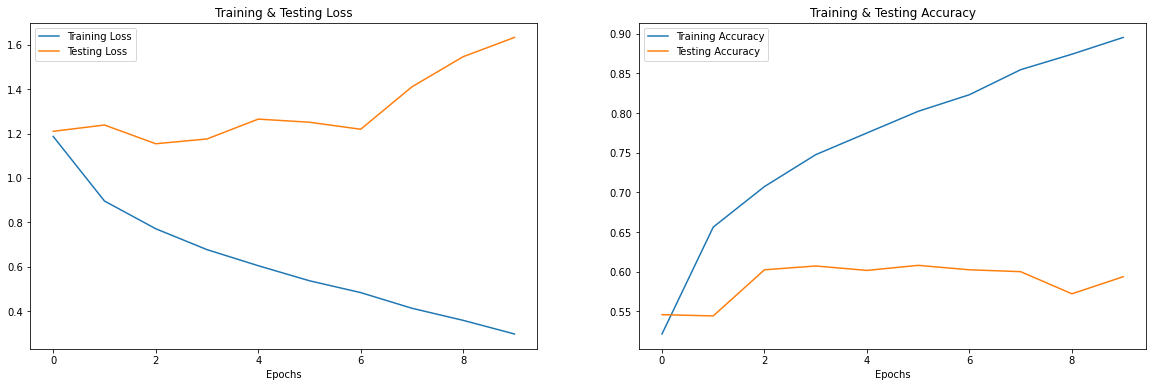

In [129]:
# code adapted from https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition/notebook

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history_3a.history['accuracy']
train_loss = history_3a.history['loss']
test_acc = history_3a.history['val_accuracy']
test_loss = history_3a.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
# plt.savefig('Model_3a_Results')
plt.show()

# Model 4 - Messing with filters and layers

In [102]:
model_4 = tf.keras.models.Sequential()
model_4.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_4.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_4.add(tf.keras.layers.Conv2D(filters=17, kernel_size=3, activation='relu'))  
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(5, activation='softmax'))


model_4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_4.summary()
model_4.fit(x=train_data, validation_data=val_data, batch_size=45, epochs=1) 


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 31, 31, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 35)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 12, 12, 17)        5372      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 17)       

So that acually performed worse. Lets decrease the batch size of model 3a in this next model, as that has performed best so far
# Model 5

In [132]:
model_5 = tf.keras.models.Sequential()
model_5.add(tf.keras.layers.Conv2D(filters=70, kernel_size=5, activation='relu', input_shape=[64, 64, 3])) 
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_5.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(5, activation='softmax'))


model_5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_5.summary()

#Massively increasing batch size to see if this helps performance
model_5.fit(x=train_data, validation_data=val_data, batch_size= 125, epochs=1) #1 epoch to start


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 60, 60, 70)        5320      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 30, 30, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 28, 28, 35)        22085     
                                                                 
 flatten_30 (Flatten)        (None, 27440)             0         
                                                                 
 dense_26 (Dense)            (None, 5)                 137205    
                                                                 
Total params: 164,610
Trainable params: 164,610
Non-trainable params: 0
_______________________________________________

Not many gains from playing around with batch sizes. We will return to batch size of 45 from model_3a and will increase the batch size to 15

# Model 6

In [141]:
model_6 = tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Conv2D(filters=70, kernel_size=5, activation='relu', input_shape=[64, 64, 3])) 
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_6.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(5, activation='softmax'))


model_6.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_6.summary()

history_6 = model_6.fit(x=train_data, validation_data=val_data, batch_size=45, epochs=15) 

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 60, 60, 70)        5320      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 30, 30, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 28, 28, 35)        22085     
                                                                 
 flatten_38 (Flatten)        (None, 27440)             0         
                                                                 
 dense_34 (Dense)            (None, 5)                 137205    
                                                                 
Total params: 164,610
Trainable params: 164,610
Non-trainable params: 0
_______________________________________________

In [142]:
filename = 'model_6.pkl'
pickle.dump(model_6, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://df259792-0983-41bd-998b-a4934a888ee3/assets


In [143]:
model_6.evaluate(test_data)


132/132 [==============================] - 56s 423ms/step - loss: 1.0656 - accuracy: 0.6357


[1.0656259059906006, 0.635670006275177]

ValueError: ignored

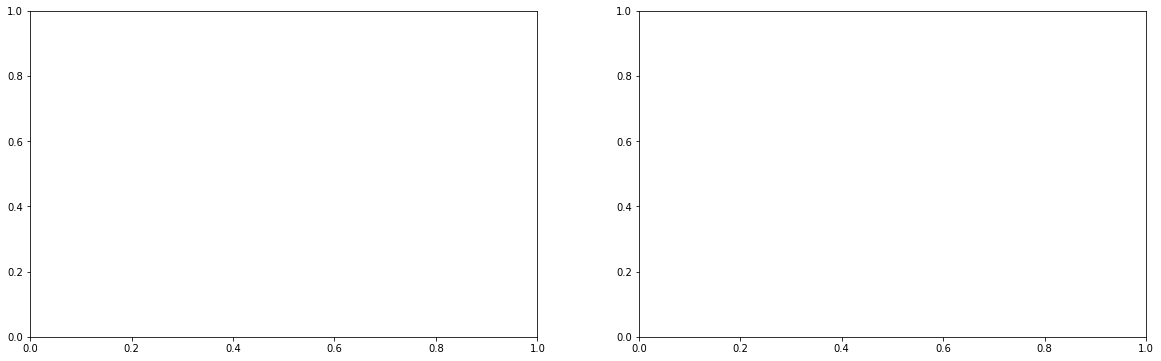

In [146]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history_6.history['accuracy']
train_loss = history_6.history['loss']
test_acc = history_6.history['val_accuracy']
test_loss = history_6.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig('Model_6_Results')
plt.show()

Testing if somethng makes it all *faster*
# Model 7

In [138]:
from keras.callbacks import ReduceLROnPlateau


In [147]:
model_7 = tf.keras.models.Sequential()
model_7.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_7.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))  
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(5, activation='softmax'))


model_7.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_7.summary()


rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history_7 = model_7.fit(x=train_data, validation_data=val_data, batch_size=45, epochs=50, callbacks=[rlrp])

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 62, 62, 70)        1960      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 31, 31, 70)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 29, 29, 35)        22085     
                                                                 
 flatten_39 (Flatten)        (None, 29435)             0         
                                                                 
 dense_35 (Dense)            (None, 5)                 147180    
                                                                 
Total params: 171,225
Trainable params: 171,225
Non-trainable params: 0
_______________________________________________

In [148]:
filename = 'model_7.pkl'
pickle.dump(model_7, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://52a37723-e53b-4d6a-badf-47b172e9cd00/assets


In [149]:
model_7.evaluate(test_data)


132/132 [==============================] - 52s 395ms/step - loss: 3.5455 - accuracy: 0.6245


[3.5455124378204346, 0.6244634985923767]

ValueError: ignored

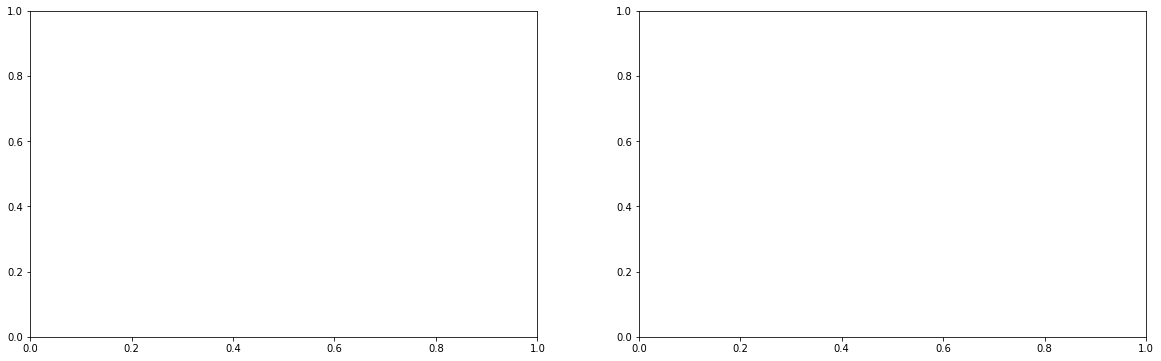

In [150]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history_7.history['accuracy']
train_loss = history_7.history['loss']
test_acc = history_7.history['val_accuracy']
test_loss = history_7.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig('Model_7_Results')
plt.show()

# Ok this was way too many epochs. It took way too long to process and overfit far too much. Lets cut it back to 25

# REEVALUATE METRIC AND JUSTIFY